In [1]:
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import metrics
import itertools
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import pandas as pd
from patsy import dmatrices
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import statsmodels.formula.api as smf
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
df_west = pd.read_csv('../data/df_west_merge.csv')

In [3]:
df_west.head()

,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
0,0,2013,21,West,90,153.8,53.3,34.3,1,28.3,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2013,22,West,93,91.9,72.7,34.7,1,28.4,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
2,2,2013,23,West,120,562.1,63.4,35.4,1,28.5,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
3,3,2013,24,West,239,51.5,67.3,34.7,1,30.0,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
4,4,2013,25,West,286,0.0,56.9,35.0,0,30.1,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0


In [4]:

df_west['index'] = df_west['yr'] * 100 + df_west['week']
df_west.head()


,Unnamed: 0,yr,week,region,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,...,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff,index
0,0,2013,21,West,90,153.8,53.3,34.3,1,28.3,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201321
1,1,2013,22,West,93,91.9,72.7,34.7,1,28.4,...,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0,201322
2,2,2013,23,West,120,562.1,63.4,35.4,1,28.5,...,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0,201323
3,3,2013,24,West,239,51.5,67.3,34.7,1,30.0,...,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0,201324
4,4,2013,25,West,286,0.0,56.9,35.0,0,30.1,...,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0,201325


In [5]:
df_west.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 392 non-null    int64  
 1   yr                         392 non-null    int64  
 2   week                       392 non-null    int64  
 3   region                     392 non-null    object 
 4   no_cases                   392 non-null    int64  
 5   total_daily_rainfall       392 non-null    float64
 6   max_wind_sp                392 non-null    float64
 7   max_temp                   392 non-null    float64
 8   rainy_day                  392 non-null    int64  
 9   mean_temp                  392 non-null    float64
 10  mean_wind_sp               392 non-null    float64
 11  min_temp                   392 non-null    float64
 12  dengue_fever               392 non-null    float64
 13  dengue                     392 non-null    float64

In [6]:
df_west = df_west.groupby(by='index').mean()
df_west.head(50)

C:\Users\ngzen\AppData\Local\Temp\ipykernel_1468\3183442370.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_west = df_west.groupby(by='index').mean()


,Unnamed: 0,yr,week,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,...,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,,
201321,0.0,2013.0,21.0,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,...,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201322,1.0,2013.0,22.0,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,...,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
201323,2.0,2013.0,23.0,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,...,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
201324,3.0,2013.0,24.0,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,...,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
201325,4.0,2013.0,25.0,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,...,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
201326,5.0,2013.0,26.0,360.0,390.5,72.7,35.6,1.0,28.8,6.792063,...,9.0,3.0,1.0,18.0,1.0,17.0,1.0,7.0,1.0,1.0
201327,6.0,2013.0,27.0,375.0,160.9,60.1,33.6,1.0,28.3,8.111111,...,8.0,1.0,-8.0,-9.0,-7.0,-8.0,-1.0,-2.0,-2.0,-3.0
201328,7.0,2013.0,28.0,393.0,390.2,71.3,33.4,1.0,27.8,8.071429,...,8.0,3.0,-2.0,6.0,-1.0,6.0,0.0,1.0,2.0,4.0
201329,8.0,2013.0,29.0,342.0,71.0,46.8,34.2,1.0,28.0,7.893651,...,8.0,2.0,-2.0,0.0,-3.0,-2.0,0.0,0.0,-1.0,-3.0


In [7]:
df_west = df_west.drop(['Unnamed: 0','yr','week'],axis =1)
df_west

,no_cases,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,,
201321,90.0,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,30.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201322,93.0,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,28.0,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
201323,120.0,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,52.0,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
201324,239.0,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,39.0,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
201325,286.0,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,23.0,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202041,120.0,546.0,87.4,33.5,1.0,27.9,9.870270,23.2,10.0,10.0,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
202042,120.0,93.0,73.5,33.8,1.0,28.8,9.831429,22.9,8.0,9.0,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
202043,120.0,233.2,70.6,34.3,1.0,28.2,9.202857,22.7,7.0,7.0,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0


In [8]:
#def scale(x):
#    max = x.max(0)
#    min = x.min(0)
#    x = (x - min)/(max-min)
 #   return x

In [9]:
df_west_X = (df_west.drop(['no_cases'],axis =1))
df_west_X

,total_daily_rainfall,max_wind_sp,max_temp,rainy_day,mean_temp,mean_wind_sp,min_temp,dengue_fever,dengue,mosquito,insect_repellent,dengue_fever_diff,dengue_fever_2nd_diff,dengue_diff,dengue_2nd_diff,mosquito_diff,mosquito_2nd_diff,insect_repellent_diff,insect_repellent_2nd_diff
index,,,,,,,,,,,,,,,,,,,
201321,153.8,53.3,34.3,1.0,28.3,6.627778,23.1,33.0,30.0,10.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201322,91.9,72.7,34.7,1.0,28.4,6.977778,22.9,29.0,28.0,9.0,3.0,-4.0,0.0,-2.0,0.0,-1.0,0.0,1.0,0.0
201323,562.1,63.4,35.4,1.0,28.5,7.022222,22.4,56.0,52.0,18.0,4.0,27.0,31.0,24.0,26.0,9.0,10.0,1.0,0.0
201324,51.5,67.3,34.7,1.0,30.0,9.268254,23.6,42.0,39.0,14.0,2.0,-14.0,-41.0,-13.0,-37.0,-4.0,-13.0,-2.0,-3.0
201325,0.0,56.9,35.0,0.0,30.1,8.660317,23.6,25.0,23.0,8.0,2.0,-17.0,-3.0,-16.0,-3.0,-6.0,-2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202041,546.0,87.4,33.5,1.0,27.9,9.870270,23.2,10.0,10.0,10.0,3.0,1.0,3.0,2.0,4.0,0.0,-1.0,0.0,1.0
202042,93.0,73.5,33.8,1.0,28.8,9.831429,22.9,8.0,9.0,8.0,3.0,-2.0,-3.0,-1.0,-3.0,-2.0,-2.0,0.0,0.0
202043,233.2,70.6,34.3,1.0,28.2,9.202857,22.7,7.0,7.0,10.0,2.0,-1.0,1.0,-2.0,-1.0,2.0,4.0,-1.0,-1.0


In [10]:
x_train, x_test, y_train, y_test =  train_test_split(df_west_X, df_west['no_cases'], test_size = 0.33, shuffle = False)

In [11]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [12]:
x = x_train_scaled
x = sm.add_constant(x)
y = y_train

In [13]:
poison_model = sm.GLM(y, x, family = sm.families.Poisson())
poison_results = poison_model.fit()

print(poison_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               no_cases   No. Observations:                  261
Model:                            GLM   Df Residuals:                      241
Model Family:                 Poisson   Df Model:                           19
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14950.
Date:                Thu, 20 Apr 2023   Deviance:                       28502.
Time:                        18:30:42   Pearson chi2:                 3.92e+04
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2113      0.008    518.648      0.0

In [14]:
poison_results.get_prediction(x).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper
0,440.959274,9.798400,422.166950,460.588118
1,530.891067,15.045372,502.206693,561.213798
2,205.142690,11.973764,182.967153,230.005892
3,291.504263,14.449424,264.516119,321.245963
4,619.279368,23.176638,575.480014,666.412258
...,...,...,...,...
256,87.659139,1.600833,84.577051,90.853542
257,22.972353,0.721751,21.600421,24.431421
258,34.585342,0.795770,33.060306,36.180727
259,20.489641,0.551694,19.436377,21.599983


In [15]:
poison_results.mu

array([440.95927362, 530.89106748, 205.14268992, 291.5042626 ,
       619.27936811, 378.86824006, 304.31798914, 231.60496905,
       109.61719894,  92.83781335, 175.31250063, 282.62991124,
       149.17298192, 201.72420413, 141.38673566,  89.01504943,
       101.37043196, 137.38993952,  90.53056929,  93.9318153 ,
       110.38736653,  56.07790336,  70.2548829 ,  65.12159562,
        87.01320442,  86.03257281, 134.54252631,  51.69255567,
        87.79553337,  80.24948727,  28.30309601,  85.40569345,
        66.2822637 ,  57.4985216 ,  43.87561976,  56.40999655,
        21.4085277 ,  74.80791942,  44.63320306, 146.3686784 ,
        23.02648787, 197.15257785, 196.04772305,  91.4762194 ,
        81.43299041,  58.39513013,  48.80453327,  52.80017131,
        55.57215735, 105.50858302, 107.54402597,  65.97099504,
        96.10839794,  96.86193302, 105.98109449,  38.40482747,
       100.14956136, 194.09470492, 273.93918435, 185.2118511 ,
       328.8812653 , 396.48783018, 717.61070492, 272.15

#### Test result

In [16]:
x_test_scaled = sm.add_constant(x_test_scaled)
test_x = x_test_scaled
test_y = y_test

In [17]:
poisson_predictions = poison_results.get_prediction(test_x)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

           mean   mean_se  mean_ci_lower  mean_ci_upper
0     74.807152  1.977236      71.030509      78.784597
1     16.888137  0.405861      16.111107      17.702642
2     98.884512  2.433786      94.227605     103.771572
3    131.409700  3.079003     125.511435     137.585147
4     79.388927  1.800525      75.937248      82.997499
..          ...       ...            ...            ...
125   97.562940  2.113736      93.506822     101.795004
126   86.360935  2.070309      82.397056      90.515504
127   56.752290  1.327821      54.208577      59.415365
128   48.536209  1.137050      46.358022      50.816741
129   12.820008  0.302214      12.241155      13.426233

[130 rows x 4 columns]


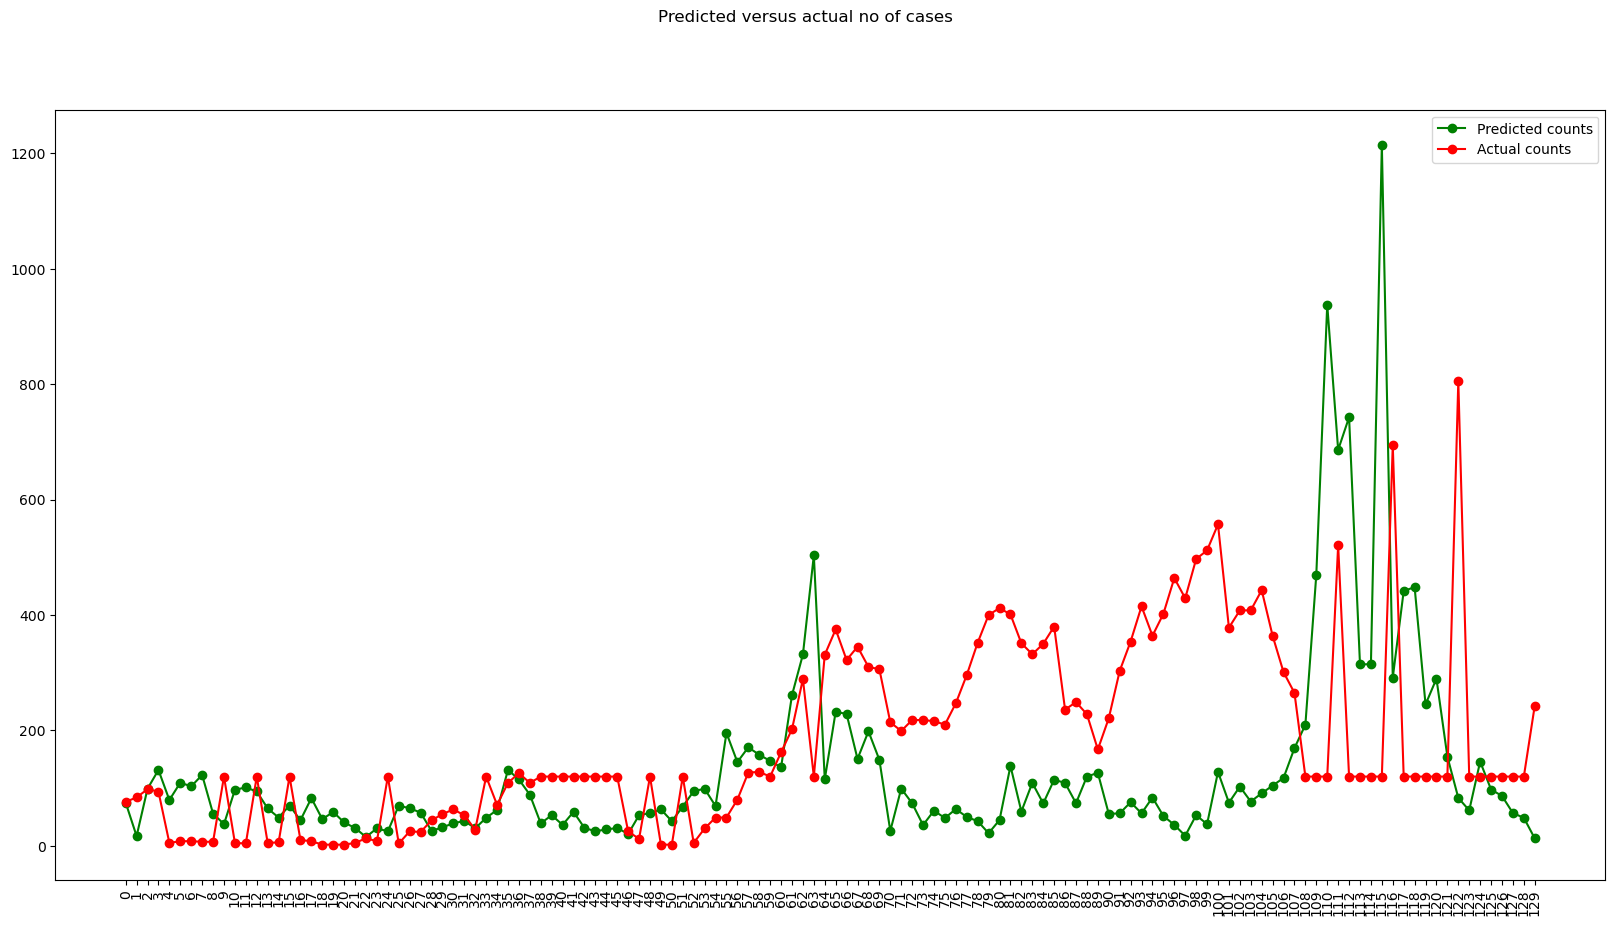

In [20]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test
x_test_sorted = range(len(x_test))
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Predicted versus actual no of cases')
predicted, = plt.plot(x_test_sorted, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test_sorted, actual_counts, 'ro-', label='Actual counts')
_xtick_labels = x_test_sorted
plt.xticks(np.arange(len(_xtick_labels)), list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()

#### Fit the Poisson regression model on the data set. This will give us the vector of fitted rates λ

In [21]:
x_train['lambda_'] = poison_results.mu
x_train['number'] = y_train
x_train['AUX_OLS_DEP'] = x_train.apply(lambda x: ((x['number'] - x['lambda_'])**2 - x['number']) / x['lambda_'], axis=1)

#### Fit the aux OLS regression model on the data set. This will give us the value of α

In [22]:
ols_expr = """AUX_OLS_DEP ~ lambda_ - 1"""

In [23]:
aux_olsr_results = smf.ols(ols_expr, x_train).fit()
print(aux_olsr_results.params)

lambda_    1.784255
dtype: float64


#### Use the α from STEP 2 to fit the NB2 regression model to the data set.

In [24]:
aux_olsr_results.tvalues

lambda_    5.532062
dtype: float64

#### Use the fitted NB2 model to make predictions about expected counts on the test data set

In [26]:
#name.remove('const')

In [28]:
#x_train = x_train.drop(['lambda_','AUX_OLS_DEP','number','BB_LAMBDA '],axis = 1)
nb2_training_results = sm.GLM(y_train, x_train, family = sm.families.NegativeBinomial(alpha = aux_olsr_results.params [0])).fit()

In [29]:
print(nb2_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               no_cases   No. Observations:                  261
Model:                            GLM   Df Residuals:                      239
Model Family:        NegativeBinomial   Df Model:                           21
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1322.9
Date:                Mon, 24 Apr 2023   Deviance:                       99.827
Time:                        06:08:59   Pearson chi2:                     60.6
No. Iterations:                    65   Pseudo R-squ. (CS):             0.5088
Covariance Type:            nonrobust                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
total_daily_rainfall  

#### Test the fit of the Negative Binomial Distribution with Two Parameters model

In [31]:
nb2_predictions = nb2_training_results.get_prediction(x_test)

ValueError: shapes (130,19) and (22,) not aligned: 19 (dim 1) != 22 (dim 0)

In [ ]:
predictions_summary_frame = nb2_predictions.summary_frame()
print(predictions_summary_frame)

In [ ]:
predicted_counts = predictions_summary_frame['mean']
actual_counts = y_test
fig = plt.figure(figsize=(20, 10))
fig.suptitle('Predicted versus actual no of cases')

# Sort x_test DataFrame by index in ascending order
x_test_sorted = x_test.sort_index()

predicted, = plt.plot(x_test_sorted.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(x_test_sorted.index, actual_counts, 'ro-', label='Actual counts')
_xtick_labels = x_test_sorted.index
plt.xticks(np.arange(len(_xtick_labels)), list(_xtick_labels), rotation=90)
plt.legend(handles=[predicted, actual])
plt.show()